## Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[15,7]

import warnings
warnings.filterwarnings('ignore')

In [63]:
sub=pd.read_csv('sample_submission_49d68Cx.csv')

In [64]:
train=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [66]:
train.shape,test.shape

((614, 13), (367, 12))

In [67]:
# Combining the dataset
combined=pd.concat([train,test],ignore_index=True)
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
combined.shape

(981, 13)

In [69]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [70]:
# changing to correct dtypes
combined.Credit_History=combined.Credit_History.astype('O')

In [71]:
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,954.000000,961.000000
mean,5179.795107,1601.916330,142.511530,342.201873
std,5695.104533,2718.772806,77.421743,65.100602
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,100.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,162.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [72]:
combined.describe(include=object).T

,count,unique,top,freq
Loan_ID,981,981,LP001002,1
Gender,957,2,Male,775
Married,978,2,Yes,631
Dependents,956,4,0,545
Education,981,2,Graduate,763
Self_Employed,926,2,No,807
Credit_History,902.0,2.0,1.0,754.0
Property_Area,981,3,Semiurban,349
Loan_Status,614,2,Y,422


# Univariate Analysis

In [73]:
# Numerical columns
num_cols=combined.select_dtypes(include=np.number).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

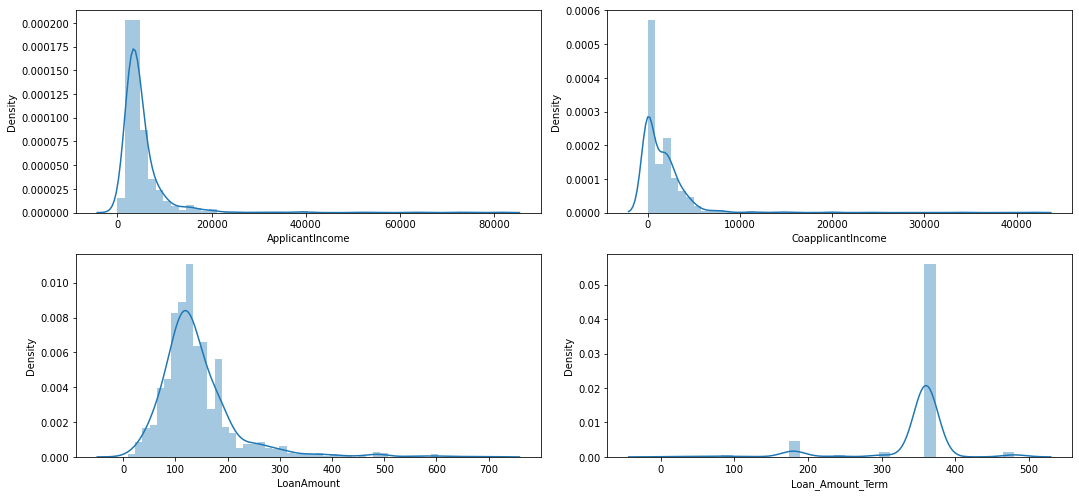

In [74]:
# Numerical columns
it=1
for i in num_cols:
    plt.subplot(2,2,it)
    sns.distplot(combined.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

In [75]:
# Categorical columns
cat_cols=combined.select_dtypes(exclude=np.number).columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

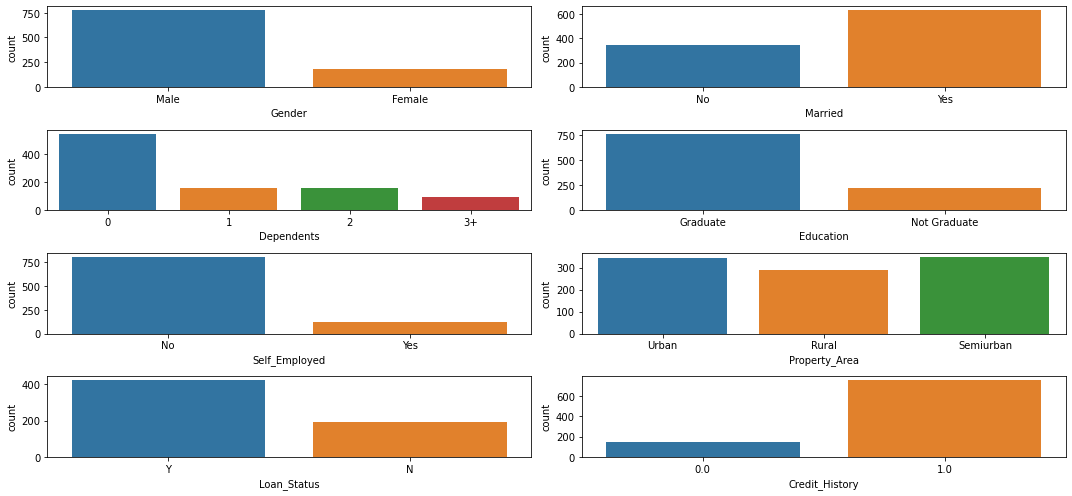

In [76]:
# categorical columns
cat_cols=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status','Credit_History']
it=1
for i in cat_cols:
    plt.subplot(4,2,it)
    sns.countplot(combined.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

# Bivariate analysis

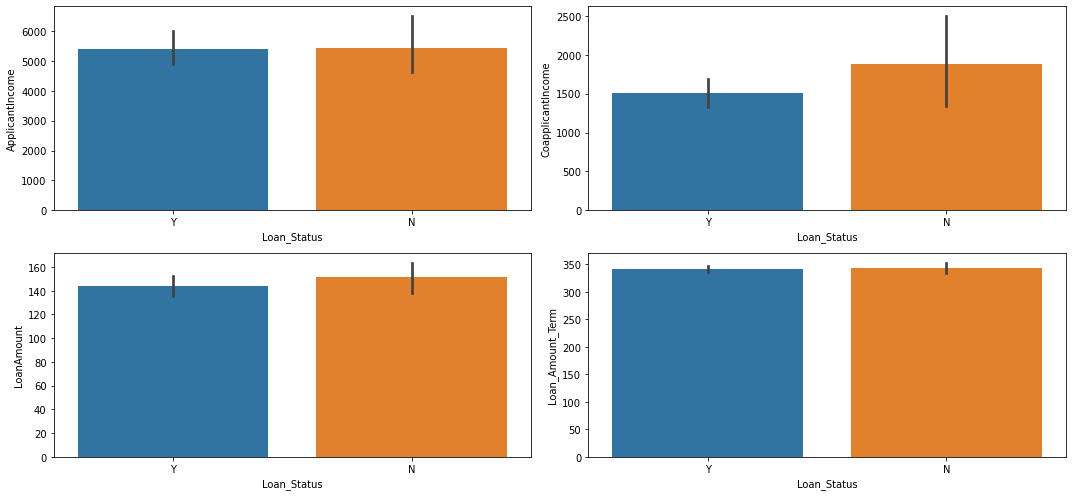

In [77]:
# Num vs cat
it=1
for i in num_cols:
    plt.subplot(2,2,it)
    sns.barplot(combined.Loan_Status,combined.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

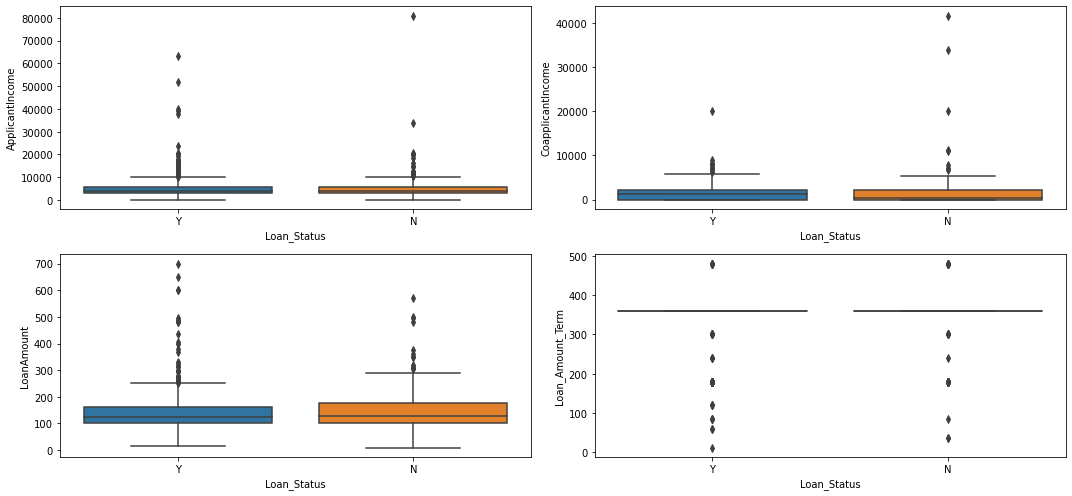

In [78]:
# Num vs Cat
it=1
for i in num_cols:
    plt.subplot(2,2,it)
    sns.boxplot(combined.Loan_Status,combined.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

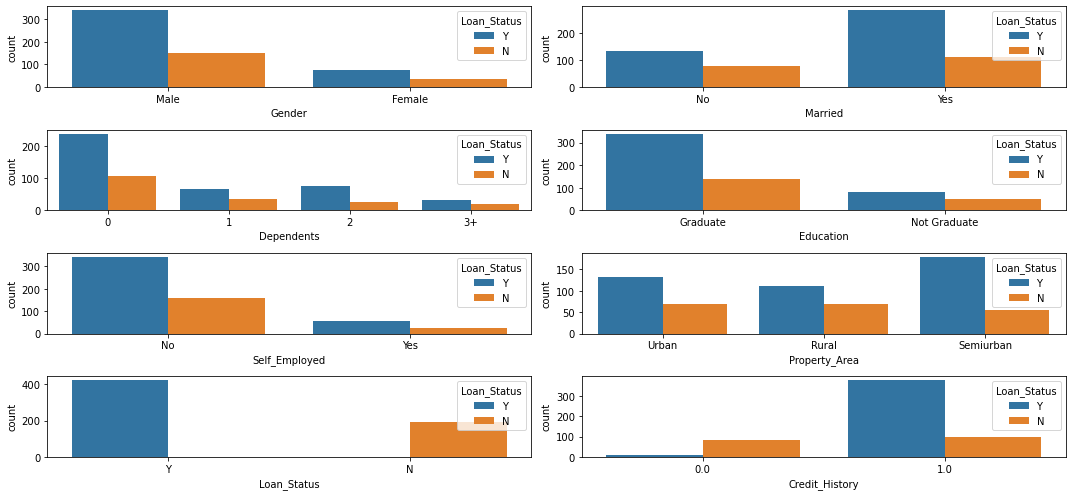

In [79]:
# cat vs cat
it=1
for i in cat_cols:
    plt.subplot(4,2,it)
    sns.countplot(combined.loc[:,i],hue=combined.Loan_Status)
    it+=1
plt.tight_layout()
plt.show()

## Multivariate analysis

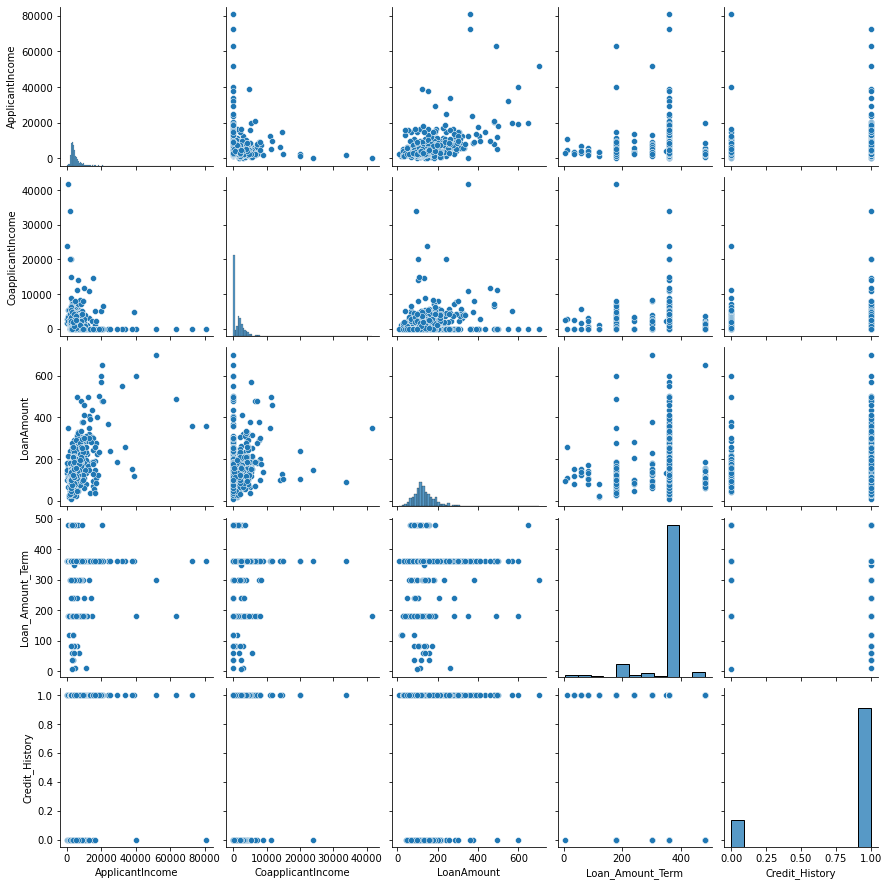

In [80]:
sns.pairplot(combined)

<AxesSubplot:>

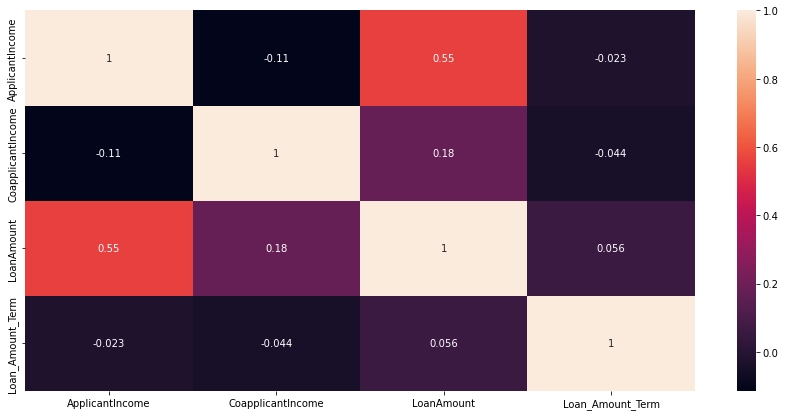

In [81]:
sns.heatmap(combined.corr(),annot=True)

# Missing value

In [82]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Gender               24
Married               3
Dependents           25
Self_Employed        55
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Loan_Status         367
dtype: int64

In [83]:
(combined.isnull().sum()/len(combined))[(combined.isnull().sum()/len(combined))!=0]

Gender              0.024465
Married             0.003058
Dependents          0.025484
Self_Employed       0.056065
LoanAmount          0.027523
Loan_Amount_Term    0.020387
Credit_History      0.080530
Loan_Status         0.374108
dtype: float64

In [84]:
# No dupicated rows
combined[combined.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [85]:
# Gender imputing with ffill
combined.Gender=combined.Gender.ffill()

In [86]:
# Married imputing with mode
combined.Married=combined.Married.fillna(combined.Married.mode()[0])

In [87]:
# Dependents imputing 
combined.loc[(combined.Married=='Yes')&(combined.Dependents.isnull()),'Dependents']='2'
combined.loc[(combined.Married=='No')&(combined.Dependents.isnull()),'Dependents']='0'

In [88]:
# Self_Employed imputing with mode
combined.Self_Employed=combined.Self_Employed.fillna(combined.Self_Employed.mode()[0])

In [89]:
# LoanAmount imputing 
combined.loc[(combined.Education=='Graduate')&(combined.LoanAmount.isnull()),'LoanAmount']=130.5
combined.loc[(combined.Education=='Not Graduate')&(combined.LoanAmount.isnull()),'LoanAmount']=118.0

In [90]:
# Loan_Amount_Term imputing with mode
combined.Loan_Amount_Term=combined.Loan_Amount_Term.fillna(combined.Loan_Amount_Term.mode()[0])

In [91]:
# Credit_History imputing 
combined.loc[(combined.Loan_Status==0)&(combined.Credit_History.isnull()),'Credit_History']=0.0
combined.loc[(combined.Loan_Status==1)&(combined.Credit_History.isnull()),'Credit_History']=1.0
combined.loc[(combined.Credit_History.isnull()),'Credit_History']=0.0


In [92]:
combined.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

# Outliers

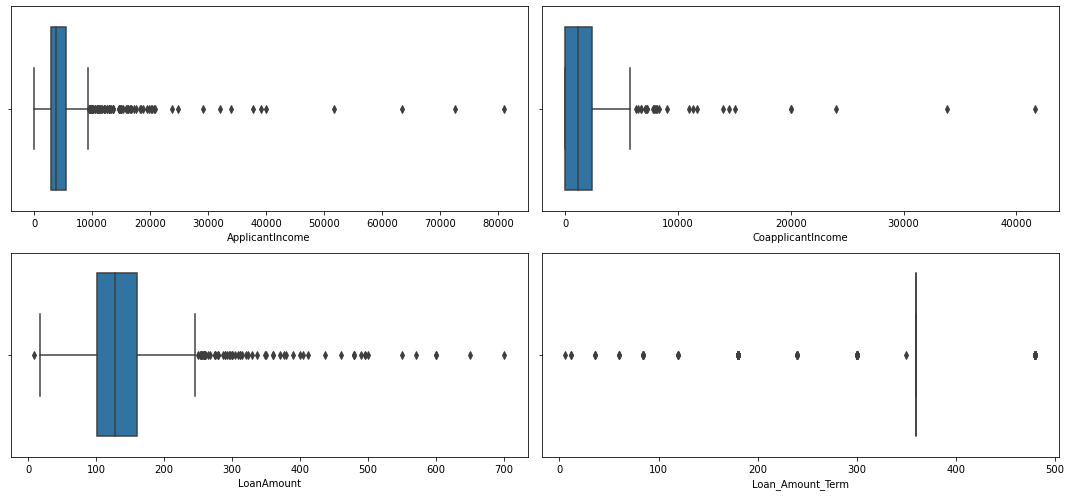

In [93]:
it=1
for i in num_cols:
    plt.subplot(2,2,it)
    sns.boxplot(combined.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

## Feature Engineering

In [94]:
combined.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [95]:
# Creating total_income column
combined['Total_income']=combined['ApplicantIncome']+combined['CoapplicantIncome']

In [96]:
# Creating total_income column
combined['Credit_History_Income_Sum']=combined.groupby('Credit_History')['Total_income'].transform('sum')

# splitting the combined data

In [97]:
train.shape,test.shape

((614, 13), (367, 12))

In [98]:
newtrain=combined.iloc[0:train.shape[0]]
newtest=combined.iloc[train.shape[0]:]

In [99]:
newtrain.shape,newtest.shape

((614, 15), (367, 15))

In [100]:
# Dropping the target column from the test
newtrain.drop('Loan_ID',axis=1,inplace=True)
newtest.drop(['Loan_ID','Loan_Status'],axis=1,inplace=True)

In [101]:
# copying
dftrain=newtrain.copy(deep=True)
dftest=newtest.copy(deep=True)

# Stastical test

In [40]:
newtrain.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Credit_History_Income_Sum
0,Male,No,0,Graduate,No,5849,0.0,130.5,360.0,1.0,Urban,Y,5849.0,5.105693e+06
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,5.105693e+06


In [41]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [42]:
# Cat vs Cat --chisquare test
# ho:The predictor and target are not related
# h1: The preddictor and target are related

sig_fea=[]
import scipy.stats as stats
for i in cat_cols:
    tbl=pd.crosstab(newtrain.loc[:,i],newtrain.Loan_Status)
    teststats,pvalue,df,exp_freq=stats.chi2_contingency(tbl)
    print('Pvalue for ',i,'is',round(pvalue,5))
    if (pvalue<0.05):
        sig_fea.append(i)
print(sig_fea)

Pvalue for  Gender is 0.84876
Pvalue for  Married is 0.02961
Pvalue for  Dependents is 0.4471
Pvalue for  Education is 0.0431
Pvalue for  Self_Employed is 1.0
Pvalue for  Property_Area is 0.00214
Pvalue for  Loan_Status is 0.0
Pvalue for  Credit_History is 0.0
['Married', 'Education', 'Property_Area', 'Loan_Status', 'Credit_History']


In [43]:
num_cols=newtrain.select_dtypes(include=np.number).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Total_income', 'Credit_History_Income_Sum'],
      dtype='object')

In [44]:
# Num Vs Cat
for i in num_cols:
    zero=newtrain.loc[newtrain.Loan_Status==0,i]
    ones=newtrain.loc[newtrain.Loan_Status==1,i]
    teststats,pvalue=stats.ttest_ind(zero,ones)
    print('Pvalue for ',i,'is',np.round(pvalue,5))

Pvalue for  ApplicantIncome is nan
Pvalue for  CoapplicantIncome is nan
Pvalue for  LoanAmount is nan
Pvalue for  Loan_Amount_Term is nan
Pvalue for  Total_income is nan
Pvalue for  Credit_History_Income_Sum is nan


## Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in num_cols:
    newtrain.loc[:,i]=mm.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i]=mm.transform(pd.DataFrame(newtest.loc[:,i]))

In [41]:
newtrain.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Credit_History_Income_Sum
0,Male,No,0,Graduate,No,0.070489,0.000000,0.175832,0.74359,1.0,Urban,Y,5849.0,5.105693e+06
1,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,0.74359,1.0,Rural,N,6091.0,5.105693e+06


# Encoding

In [121]:
# replacing the column values
newtrain.Loan_Status=newtrain.Loan_Status.replace({'N':0,'Y':1})

In [122]:
newtrain=pd.get_dummies(newtrain,drop_first=True)
newtrain.shape

(614, 17)

In [123]:
newtest=pd.get_dummies(newtest,drop_first=True)
newtest.shape

(367, 16)

# Split

In [97]:
X=newtrain.drop('Loan_Status',axis=1)
y=newtrain.Loan_Status
X.shape

(614, 16)

# Model Building

### Logistic Regression

In [109]:
len(pred)

367

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
lr=LogisticRegression()
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred=lr.fit(xtrain,ytrain).predict(newtest)
    accuracy.append(accuracy_score(ytest,pred))
finalpred_lr=pd.DataFrame(pred).T.mode(axis=1)
# print(np.mean(accuracy))


NameError: name 'X' is not defined

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
lr=LogisticRegression()
pred=[]
accuracy=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    ytest=y.iloc[test_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))
#     accuracy.append(accuracy_score(ytest,pred))
finalpred_lr=pd.DataFrame(pred).T.mode(axis=1)
# print(np.mean(accuracy))
ytest

2      1
7      0
11     1
12     1
14     1
      ..
580    1
581    0
586    1
592    1
604    1
Name: Loan_Status, Length: 122, dtype: int64

In [63]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(finalpred_lr[0],ytest)

ValueError: Found input variables with inconsistent numbers of samples: [367, 122]

In [417]:
finalpred_lr[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_lr[0]))
sub['Loan_Status']=finalpred_lr
sub.to_csv('Logistic_Model.csv',index=False)                                         # 0.7569444444444444

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
pred_rf=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred_rf.append(rf.fit(xtrain,ytrain).predict(newtest))
finalpred=pd.DataFrame(pred_rf).T.mode(axis=1)

In [415]:
finalpred[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred[0]))
sub['Loan_Status']=finalpred
sub.to_csv('Random_Forestt.csv',index=False)                                     # 0.7708333333333334.

### Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
pred_gb=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred_gb.append(gb.fit(xtrain,ytrain).predict(newtest))
finalpred_gb=pd.DataFrame(pred_gb).T.mode(axis=1)                                 #  0.7569444444444444.

In [420]:
finalpred_gb[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_gb[0]))
sub['Loan_Status']=finalpred_gb
sub.to_csv('GradientBoosting.csv',index=False)

In [67]:
from xgboost import XGBClassifier
xg=XGBClassifier()
pred_xg=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred_xg.append(xg.fit(xtrain,ytrain).predict(newtest))            
finalpred_xg=pd.DataFrame(pred_xg).T.mode(axis=1)

In [422]:
finalpred_xg[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_xg[0]))
sub['Loan_Status']=finalpred_xg
sub.to_csv('XGBoost.csv',index=False)                                            # 0.7222222222222222.

In [68]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier()
pred_lg=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred_lg.append(lg.fit(xtrain,ytrain).predict(newtest))
finalpred_lg=pd.DataFrame(pred_lg).T.mode(axis=1)                          # 0.7291666666666666

In [424]:
finalpred_lg[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_lg[0]))
sub['Loan_Status']=finalpred_lg
sub.to_csv('LightGBM.csv',index=False)

### Parameter Tuning for rf

In [69]:
from sklearn.model_selection import GridSearchCV
params=({'n_estimators':[100,200,500],
        'max_depth':[2,4,6,8],
        'min_samples_split':[2,4,6],
        'criterion':['gini','entropy']})
rf=RandomForestClassifier()
grid=GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(X,y)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_tuned=RandomForestClassifier(n_estimators=200,max_depth=2,min_samples_split=2,
                               criterion='gini')
pred_rf_tuned=[]

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred_rf_tuned.append(rf_tuned.fit(xtrain,ytrain).predict(newtest))
finalpred_rftuned=pd.DataFrame(pred_rf_tuned).T.mode(axis=1)

In [73]:
finalpred_rftuned[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_rftuned[0]))
sub['Loan_Status']=finalpred_rftuned
sub.to_csv('Random_Forest_tuned.csv',index=False)                        # 0.7638888888888888

## Stacking Model

In [80]:
from sklearn.ensemble import StackingClassifier
basemodels=[('rf',rf),('gb',gb)]
final_model=RandomForestClassifier(n_estimators=200,max_depth=2,min_samples_split=2,
                               criterion='gini')
stack=StackingClassifier(estimators=basemodels,final_estimator=final_model,
                        cv=5)
pred_stack=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]    
    pred_stack.append(stack.fit(xtrain,ytrain).predict(newtest))    
finalpred_stack=pd.DataFrame(pred_stack).T.mode(axis=1)

In [81]:
finalpred_stack[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_stack[0]))
sub['Loan_Status']=finalpred_stack
sub.to_csv('StackingModel.csv',index=False)                      # 0.75.

## Smote

In [91]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Before smote ',Counter(y))
smote=SMOTE(sampling_strategy=0.5,random_state=0)
x_sm,y_sm=smote.fit_resample(X,y)
print('After smote ',Counter(y_sm))


Before smote  Counter({1: 422, 0: 192})
After smote  Counter({1: 422, 0: 211})


In [92]:
# Spilting the data after SMOTE
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.25,random_state=0)

In [93]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(newtest)
ypred=pd.DataFrame(ypred)
ypred

,0
0,1
1,1
2,1
3,0
4,1
...,...
362,1
363,1
364,0
365,1


In [95]:
ypred[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),ypred[0]))
sub['Loan_Status']=ypred
sub.to_csv('rfModel_smote1.csv',index=False)                             # 0.7291666666666666.

# Dropping 2 columns and model building

In [46]:
# Dropping the target column from the test
train1=newtrain.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)
test1=newtest.drop(['CoapplicantIncome','ApplicantIncome'],axis=1)  

In [47]:
train1.shape,test1.shape

((614, 15), (367, 14))

In [48]:
X1=train1.drop('Loan_Status',axis=1)
y1=train1.Loan_Status
X1.shape

(614, 14)

In [49]:
newtest.shape

(367, 16)

In [53]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
from sklearn.ensemble import RandomForestClassifier
                      
rf=RandomForestClassifier()
pred_rf1=[]

for train_index,test_index in kfold.split(X1,y1):
    xtrain=X1.loc[train_index]
    ytrain=y1.loc[train_index]
    pred_rf1.append(rf.fit(xtrain,ytrain).predict(test1))
finalpred1=pd.DataFrame(pred_rf1).T.mode(axis=1)

In [55]:
xtrain.shape,ytrain.shape

((492, 14), (492,))

In [56]:
X1.shape,y1.shape

((614, 14), (614,))

In [57]:
finalpred1[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred1[0]))
sub['Loan_Status']=finalpred1
sub.to_csv('Random_Forest2.csv',index=False)                             # 0.7430555555555556.

In [59]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
from sklearn.linear_model import LogisticRegression
                      
lr1=LogisticRegression()
pred_lr1=[]

for train_index,test_index in kfold.split(X1,y1):
    xtrain=X1.loc[train_index]
    ytrain=y1.loc[train_index]
    pred_lr1.append(lr1.fit(xtrain,ytrain).predict(test1))
finalpred_lr1=pd.DataFrame(pred_lr1).T.mode(axis=1)

In [60]:
finalpred_lr1[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_lr1[0]))
sub['Loan_Status']=finalpred_lr1
sub.to_csv('Linearmodel2.csv',index=False)                  # 0.7083333333333334.

# Without scaling models

## encoding

In [102]:
# replacing the column values
dftrain.Loan_Status=dftrain.Loan_Status.replace({'N':0,'Y':1})

In [103]:
dftrain=pd.get_dummies(dftrain,drop_first=True)
dftrain.shape

(614, 17)

In [104]:
dftest=pd.get_dummies(dftest,drop_first=True)
dftest.shape

(367, 16)

In [106]:
X2=dftrain.drop('Loan_Status',axis=1)
y2=dftrain.Loan_Status
X2.shape

(614, 16)

In [107]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
from sklearn.ensemble import RandomForestClassifier
                      
rf2=RandomForestClassifier()
pred_rf2=[]

for train_index,test_index in kfold.split(X2,y2):
    xtrain=X2.loc[train_index]
    ytrain=y2.loc[train_index]
    pred_rf2.append(rf2.fit(xtrain,ytrain).predict(dftest))
finalpred2=pd.DataFrame(pred_rf1).T.mode(axis=1)

In [108]:
finalpred2[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred2[0]))
sub['Loan_Status']=finalpred2
sub.to_csv('Random_Forest_ws.csv',index=False)                            #  0.7430555555555556

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
gb2=GradientBoostingClassifier()
pred_gb2=[]
for train_index,test_index in kfold.split(X2,y2):
    xtrain=X2.loc[train_index]
    ytrain=y2.loc[train_index]
    pred_gb2.append(gb2.fit(xtrain,ytrain).predict(dftest))
finalpred_gb2=pd.DataFrame(pred_gb2).T.mode(axis=1)  

In [110]:
finalpred_gb2[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred_gb2[0]))
sub['Loan_Status']=finalpred_gb2
sub.to_csv('GradientBoosting_ws.csv',index=False)                           #  0.75

## smote

In [112]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Before smote ',Counter(y2))
smote=SMOTE(random_state=0)
x_sm2,y_sm2=smote.fit_resample(X2,y2)
print('After smote ',Counter(y_sm2))

Before smote  Counter({1: 422, 0: 192})
After smote  Counter({1: 422, 0: 422})


In [113]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
from sklearn.ensemble import RandomForestClassifier
                      
rf3=RandomForestClassifier()
pred_rf3=[]

for train_index,test_index in kfold.split(x_sm2,y_sm2):
    xtrain=x_sm2.loc[train_index]
    ytrain=y_sm2.loc[train_index]
    pred_rf3.append(rf3.fit(xtrain,ytrain).predict(dftest))
finalpred3=pd.DataFrame(pred_rf3).T.mode(axis=1)

In [114]:
finalpred3[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),finalpred3[0]))
sub['Loan_Status']=finalpred3
sub.to_csv('Random_Forest_3.csv',index=False)                       #  0.6875.

# Lazy presentation

In [124]:
X=newtrain.drop('Loan_Status',axis=1)
y=newtrain.Loan_Status
X.shape

(614, 16)

In [125]:
# Spilting the data after SMOTE
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=0)

In [127]:
from lazypredict.Supervised import LazyClassifier
lc=LazyClassifier(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions=lc.fit(xtrain,xtest,ytrain,ytest)
models

 31%|█████████████████████████▊                                                         | 9/29 [00:00<00:00, 20.32it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:01<00:00, 24.28it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 21.38it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.78,0.72,0.72,0.78,0.21
LinearSVC,0.80,0.72,0.72,0.79,0.06
NearestCentroid,0.80,0.72,0.72,0.79,0.01
CalibratedClassifierCV,0.80,0.72,0.72,0.79,0.12
RidgeClassifierCV,0.80,0.72,0.72,0.79,0.02
RidgeClassifier,0.80,0.72,0.72,0.79,0.02
LinearDiscriminantAnalysis,0.80,0.72,0.72,0.79,0.02
LogisticRegression,0.80,0.72,0.72,0.79,0.02
SVC,0.79,0.71,0.71,0.79,0.03


In [138]:
lr4=LogisticRegression()
lr4.fit(xtrain,ytrain)
ypred4=lr4.predict(newtest)
ypred4=pd.DataFrame(ypred4)
ypred4[0]

0      1
1      1
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: 0, Length: 367, dtype: int64

In [142]:
ypred4[0]=list(map(lambda x:str(x).replace('0','N').replace('1','Y'),ypred4[0]))
sub['Loan_Status']=ypred4
sub.to_csv('LinearRegression4.csv',index=False)                    #0.7152777777777778.

,0
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y
